In [1]:
from modified_bowtie import *

from IPython.display import display, HTML
display(HTML(data="""<style> div#notebook-container { width: 99%; } div#menubar-container { width: 85%; } div#maintoolbar-container { width: 99%; } </style>"""))

# The geometric factor

<span style="font-size:1.5em;">
The geometric factor, often denoted as G [$cm^{2} sr$], is a physical quantity that characterizes a particle instrument's response to a charged particle distribution. Knowledge of the geometric factor is required to convert particle counts (directly measured quantity) to the physical unit of intensity (estimated quantity).

The geometric factor is often extremely challenging or impossible to analytically calculate, and hence it is often determined either experimentally or numerically using Monte Carlo simulations.

A traditional bow-tie analysis yields a geometric factor and an effective energy for an energy channel of an instrument. The aim of the modified bow-tie analysis is to find an effective energy range accompanied by the geometric factor.
</span>

# Modified bow-tie analysis

<span style="font-size:1.5em;">

Assuming that the energy spectrum of a particle population can be expressed as a power law, $I(E) = AE^{-\gamma}$, the counting rate of an energy channel can be expressed such that:

\begin{align}
C = \int_{0}^{E_{\inf}} A E^{-\gamma} R(E)~\mathrm{d}E.
\end{align}

Assuming further that the energy range is $E \in [E_{1}, E_{2}]$, where $E_{2} = E_{1} + \Delta E$, the mean intensity in this channel is:

\begin{align}
\bar{I} = \frac{1}{\Delta E} \int_{E_{1}}^{E_{2}} A E^{-\gamma}~\mathrm{d}E.
\end{align}

Equating the mean intensity to the counting rate divided by $G \Delta E$, where $G$ is the geometric factor of the channel, one gets:

\begin{align}
G_{\gamma}(E_{2};E_{1}) = (\gamma - 1) \frac{\int_{0}^{E_{\inf}} E^{-\gamma} R(E)~\mathrm{d}E}{E_{1}^{1-\gamma} - E_{2}^{1-\gamma}},
\end{align}

Where $G_{\gamma}(E_{2};E_{1})$ represents the geometric factor of an energy channel for a particle spectrum with a sprectral index $\gamma$ and an upper energy bound $E_{2}$.

</span>

<figure>
    <img src="side0_response_stats/channel_response_as_a_function_of_proton_energy.png"
         alt="p_responses">
    <figcaption> <strong>Figure 1</strong>. The simulated response functions (R(E) in the equations) of SIXS-P proton channels.</figcaption>
</figure>

## Read in the channel identifiers, incident energies and corresponding channel responses
> Must have data files "channel_responses.npy", "channel_names.npy" and "incident_energies.npy" either in the same directory with this notebook, or in a directory designated by the keyword `path` in the read_response_data() function.

> "responses" below are pandas DataFrames that list each channel response as a function of incident particle energy


In [2]:
# SIXS-P has 5 sides: (0,1,2,3,4)
side = 0

e_responses = read_response_data(side=side, particle='e')
p_responses = read_response_data(side=side, particle='p')
display(e_responses)
display(p_responses)

,E1,E2,E3,E4,E5,E6,E7
0.010090,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.010274,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.010460,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.010650,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.010843,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
186007.840181,0.0,0.0,0.0,0.0,0.0,0.0,0.0
189384.202733,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192821.852079,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196321.900679,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,P1,P2,P3,P4,P5,P6,P7,P8,P9
0.010090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.010274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.010460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.010650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.010843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
186007.840181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
189384.202733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192821.852079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196321.900679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Run modified bow-tie to either a single channel, or to all channels by choosing channel="all".

> The results are returned as a dictionary, that maps the channel to their corresponding lower energy bound, higher energy bound and the optimal geometric factor.

The modified_bowtie() -function accepts the following arguments:
1. data : {pd.DataFrame}
2. side : {int}
3. channel : {str}
4. particle : {str} (optional)
5. max_energy : {float,int} (optional)
6. plot : {bool} (optional)
7. save : {bool} (optional)

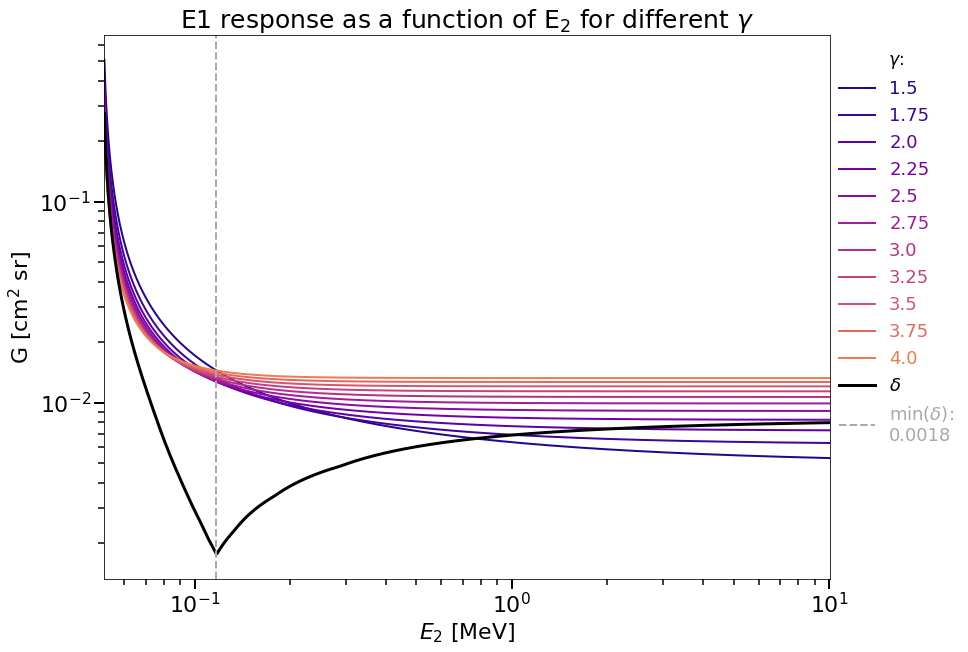

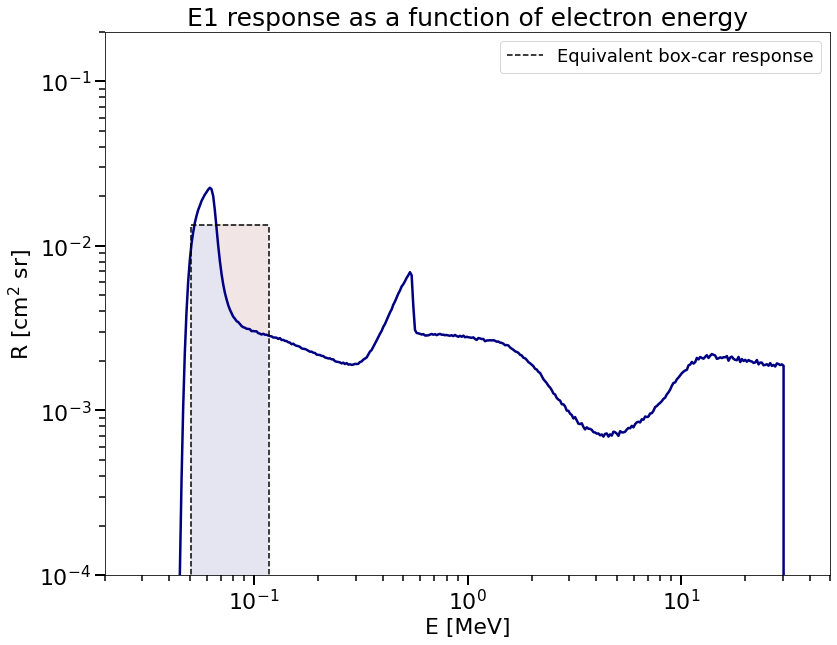

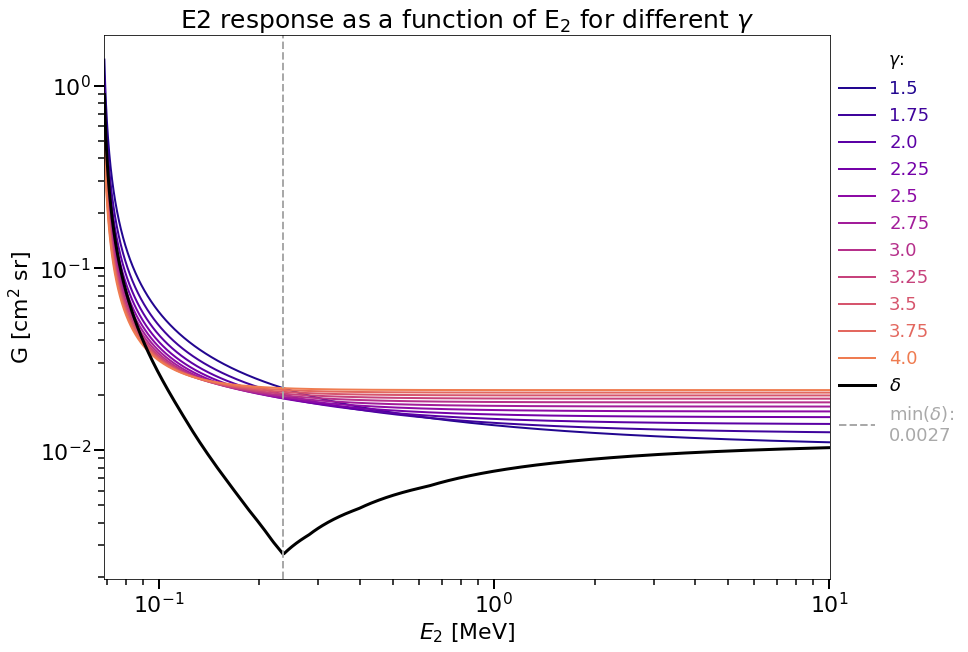

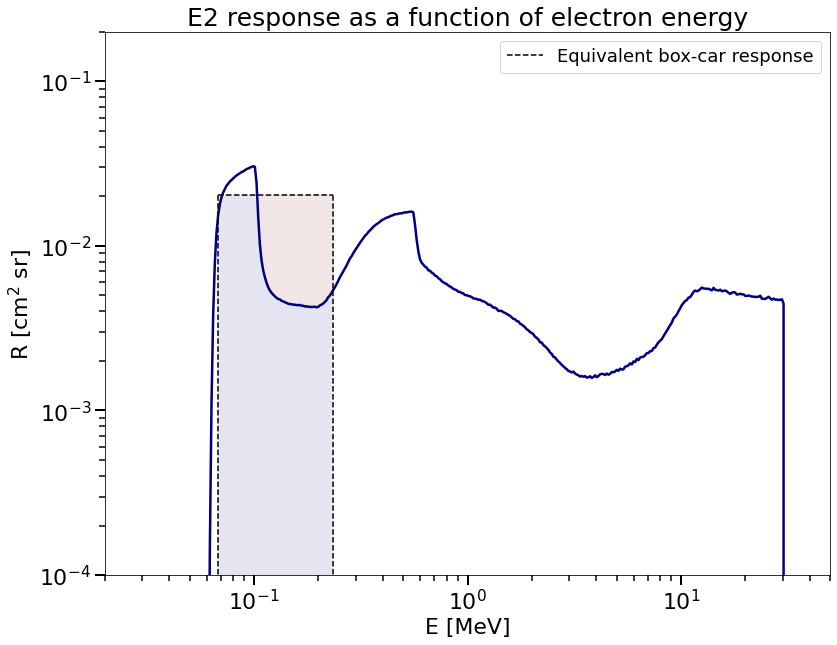

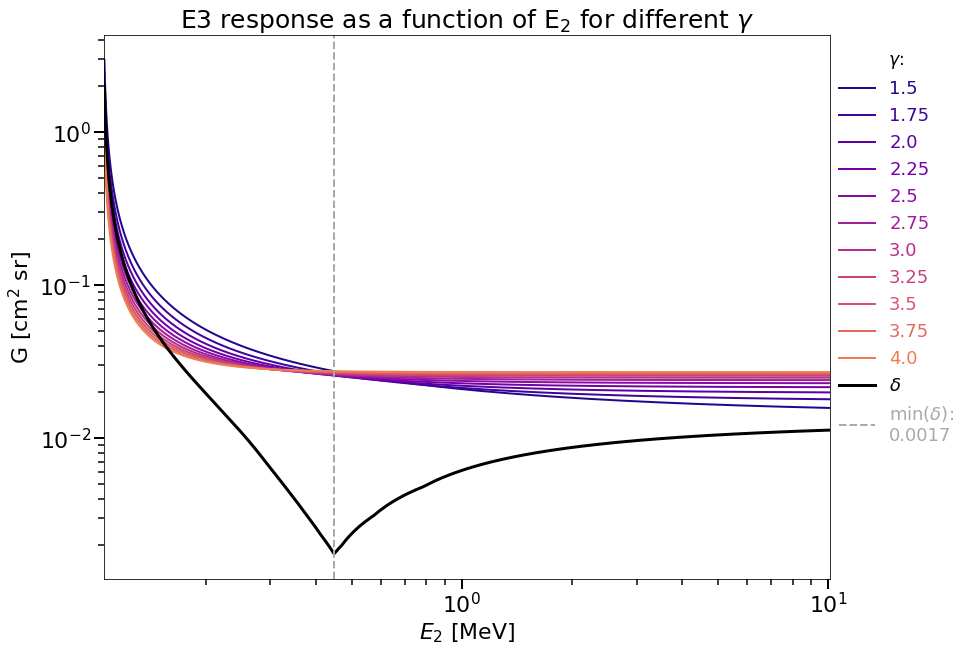

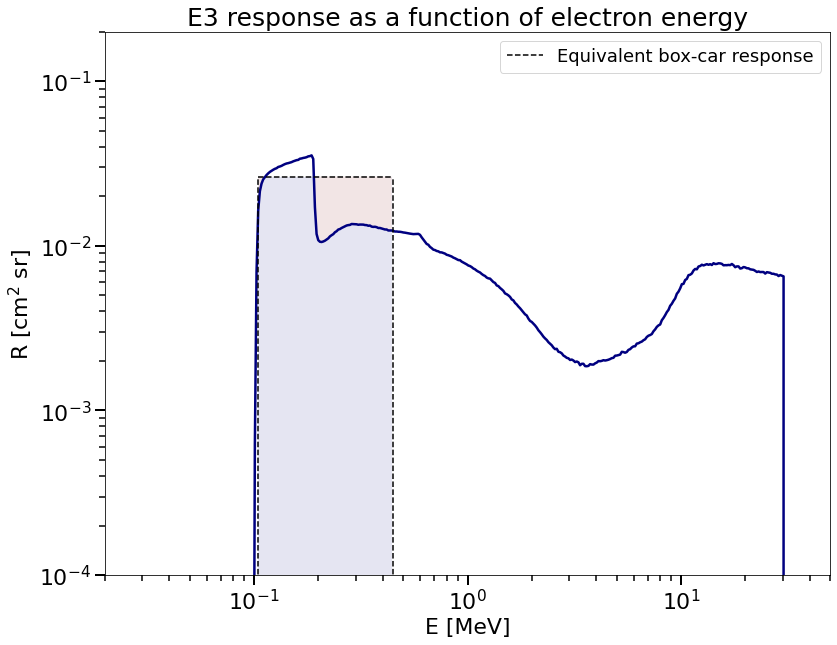

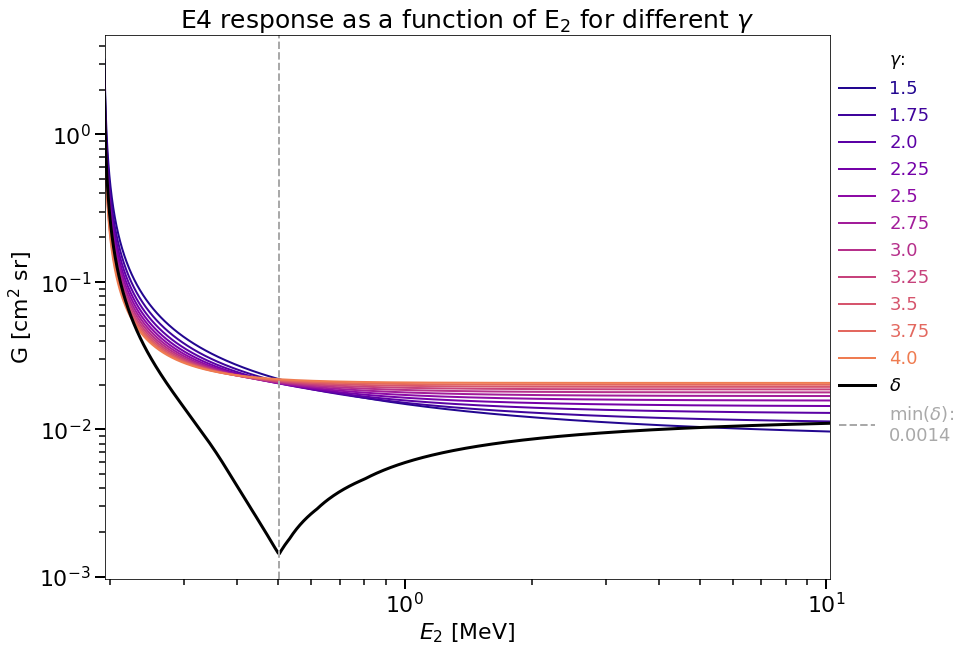

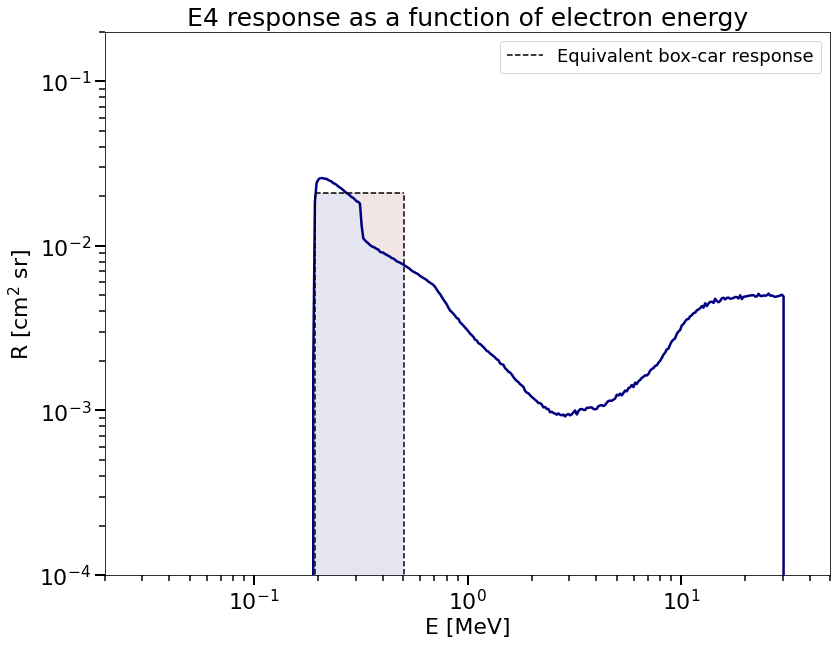

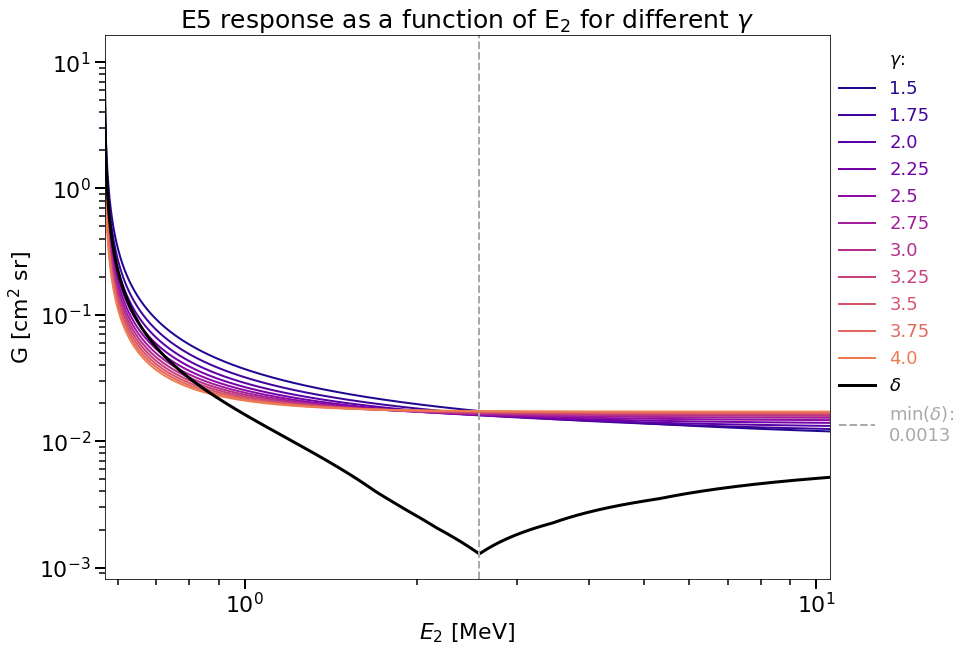

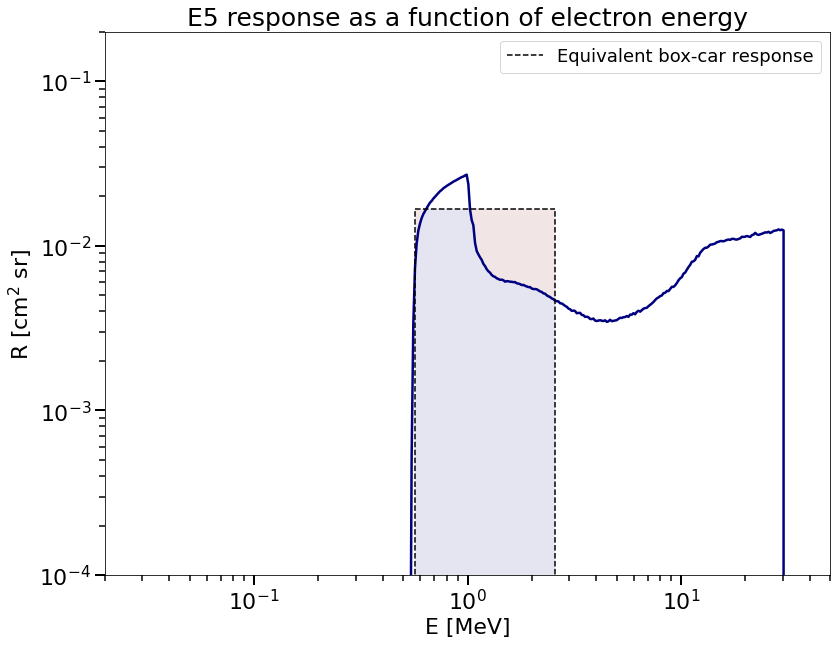

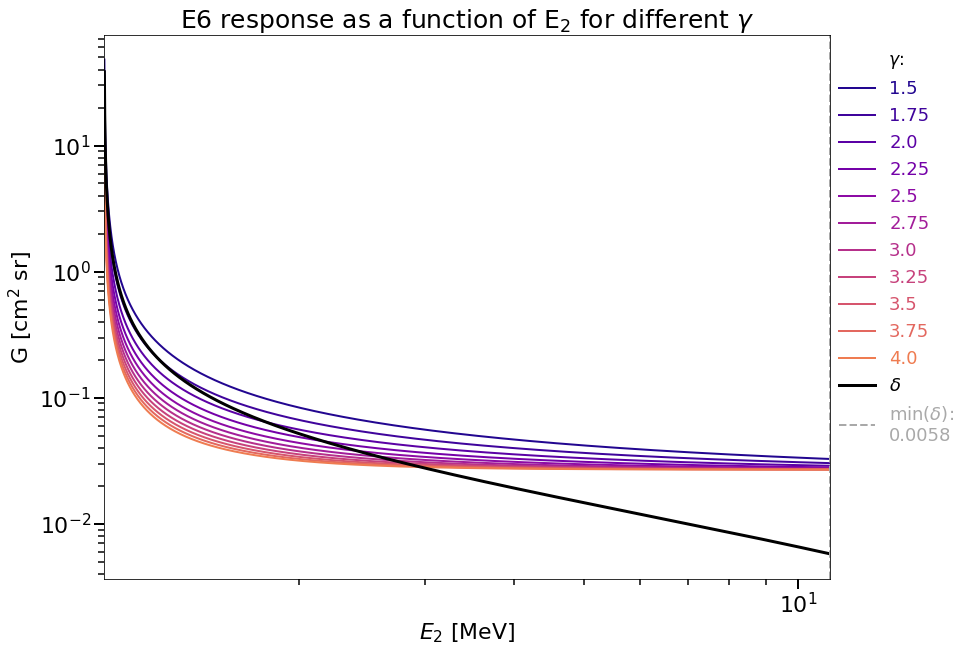

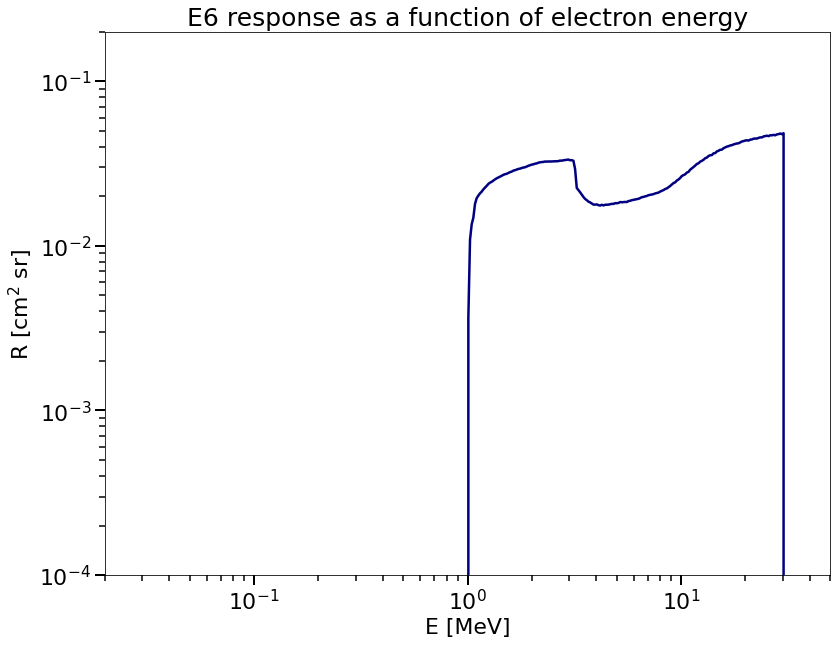

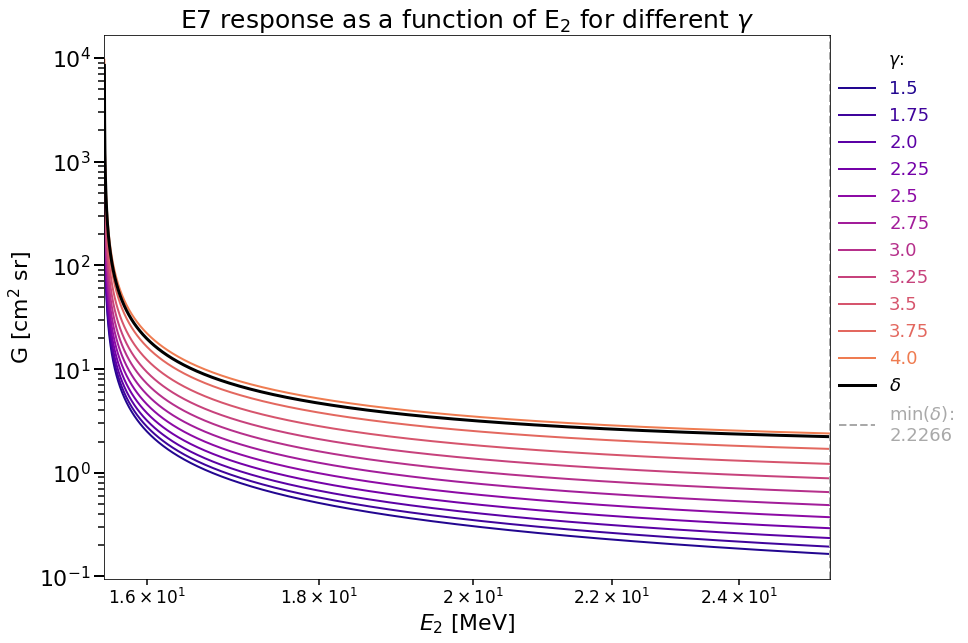

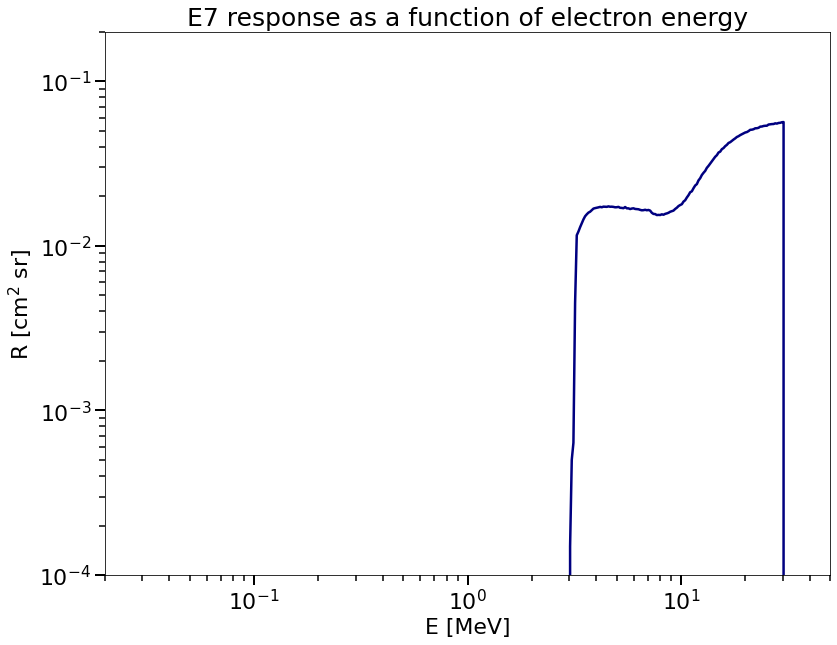

In [3]:
e_bowtie_results = modified_bowtie(data=e_responses, side=side, channel="all", save=False)

In [4]:
e_bowtie_results

{'E1': (0.0509367521678013, 0.11702564550733002, 0.013451534154682554),
 'E2': (0.0679252507005547, 0.23491817610431798, 0.020373167859808226),
 'E3': (0.1045998953430253, 0.447629739314762, 0.026322496732912995),
 'E4': (0.1928218520789196, 0.5036392736117032, 0.021036565733780366),
 'E5': (0.5674221042796429, 2.5715581300620873, 0.016657807100827114),
 'E6': (1.064985635350429, nan, nan),
 'E7': (15.53839831274974, nan, nan)}

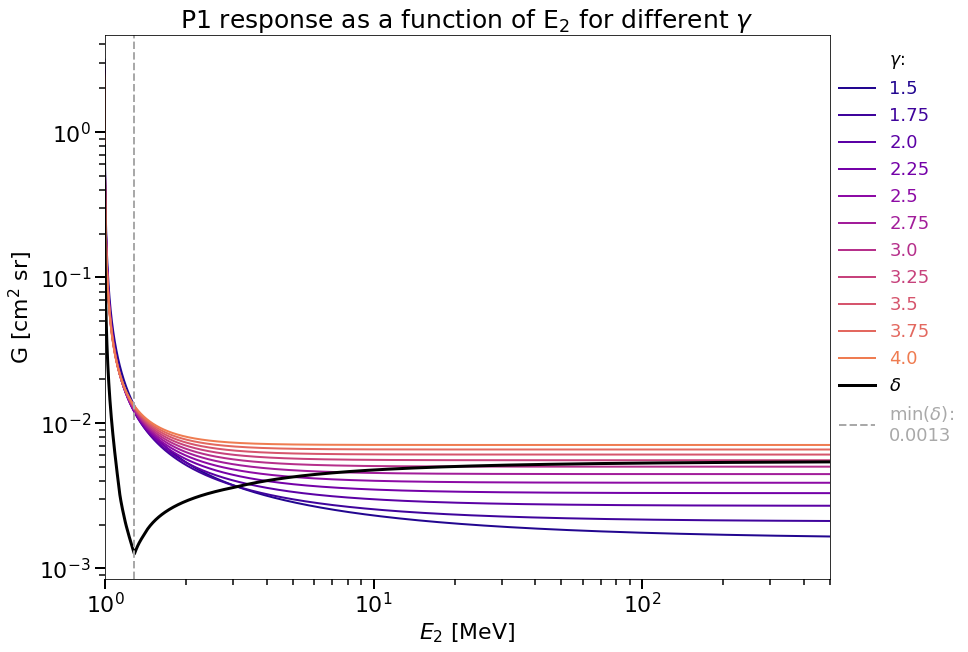

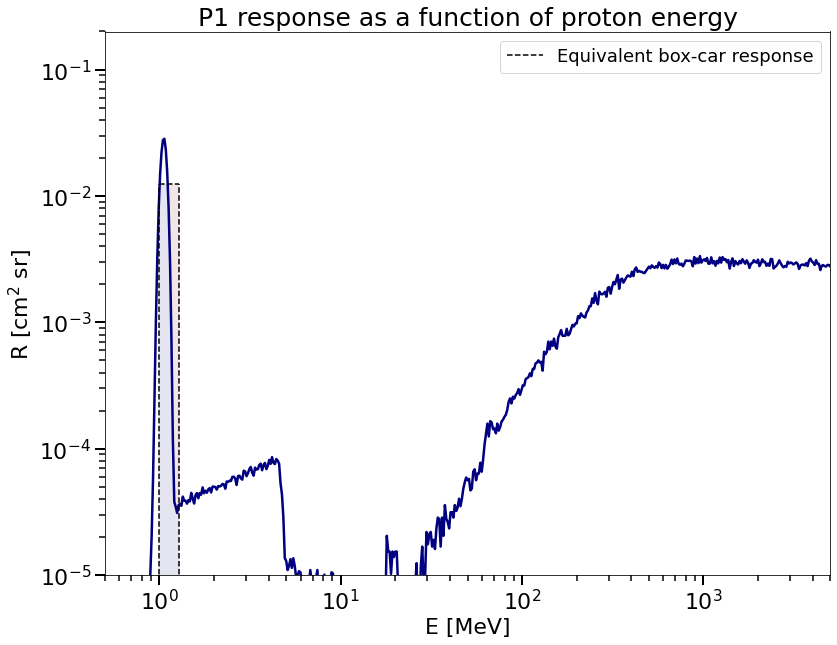

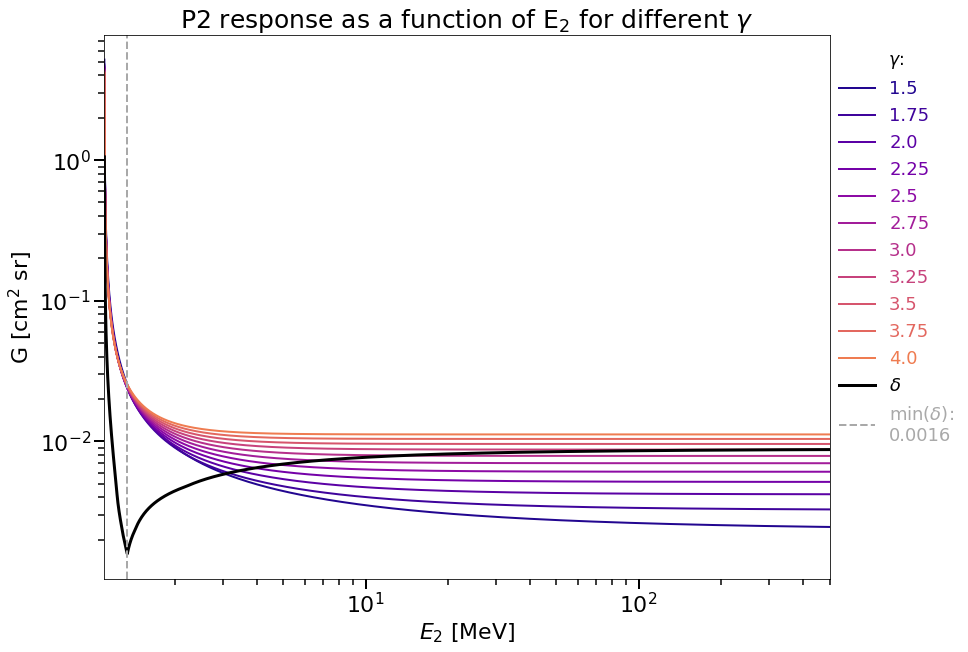

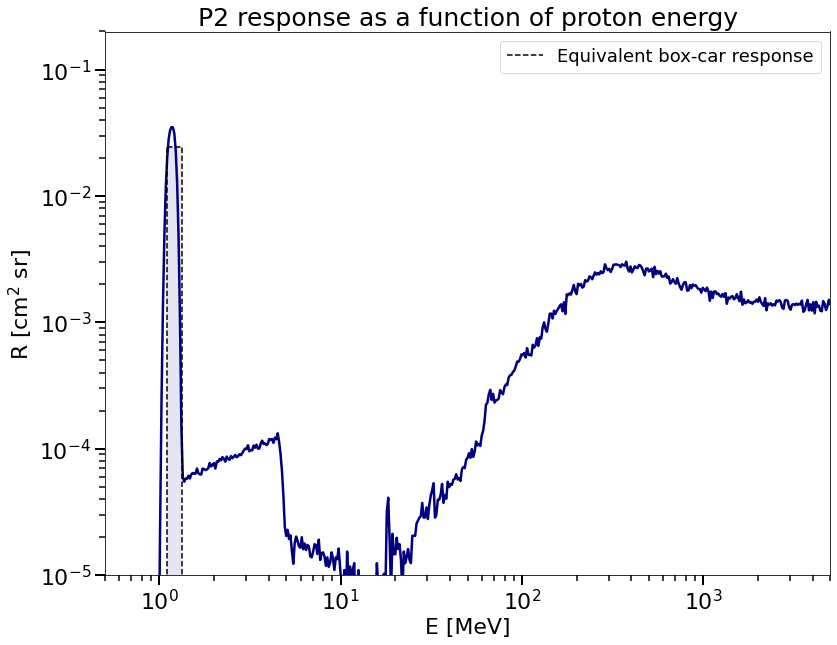

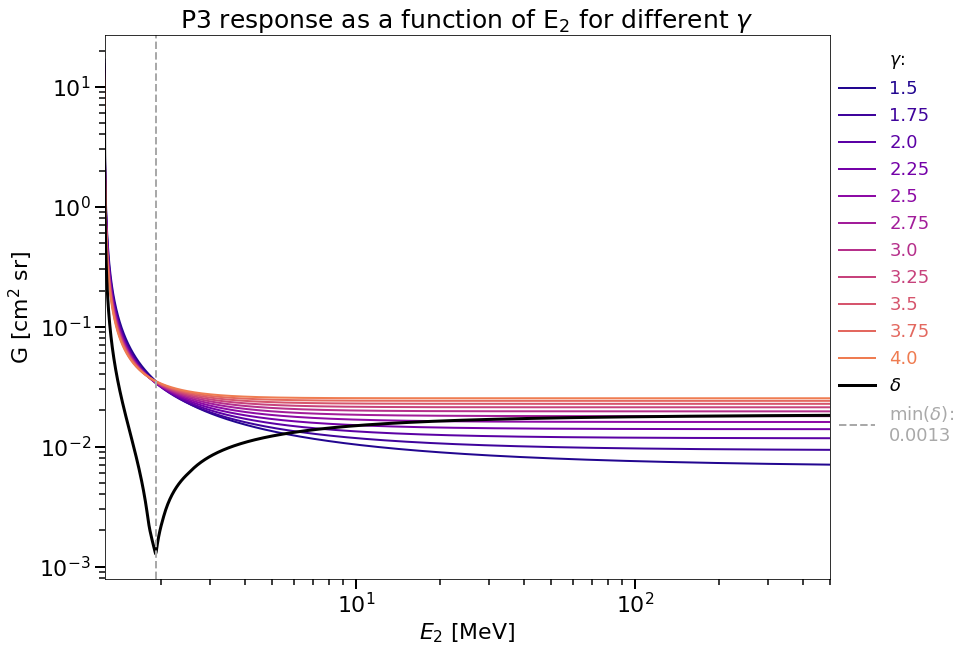

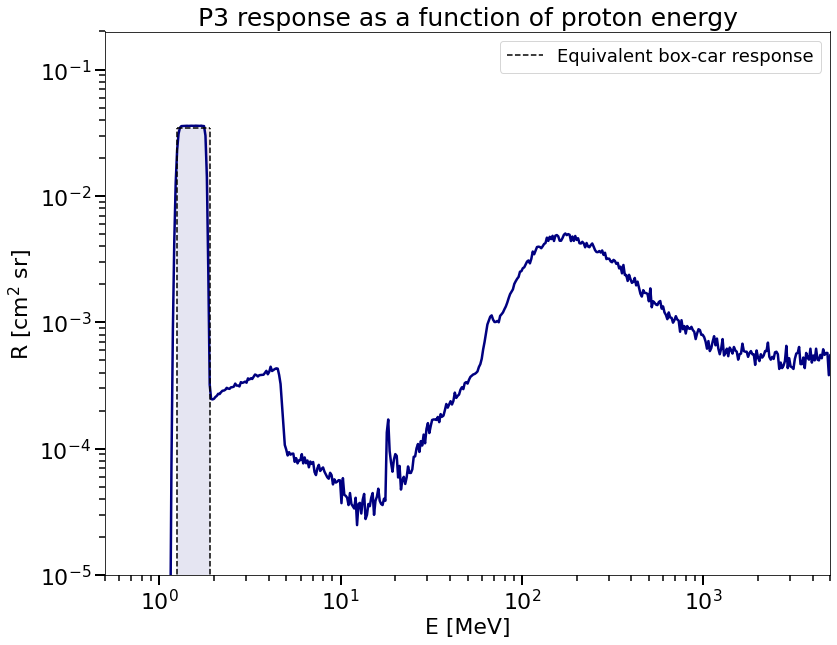

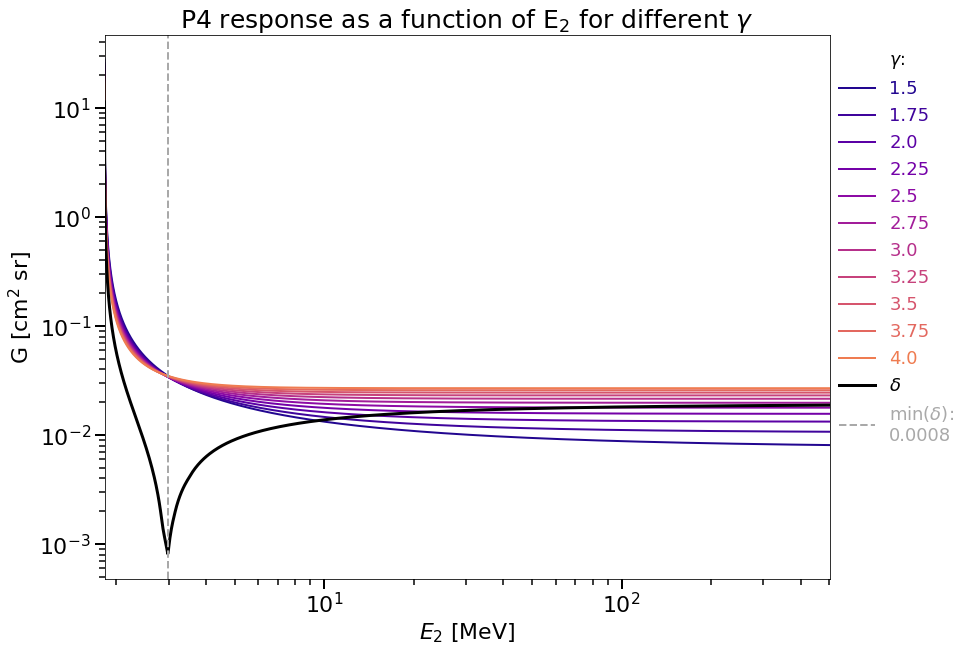

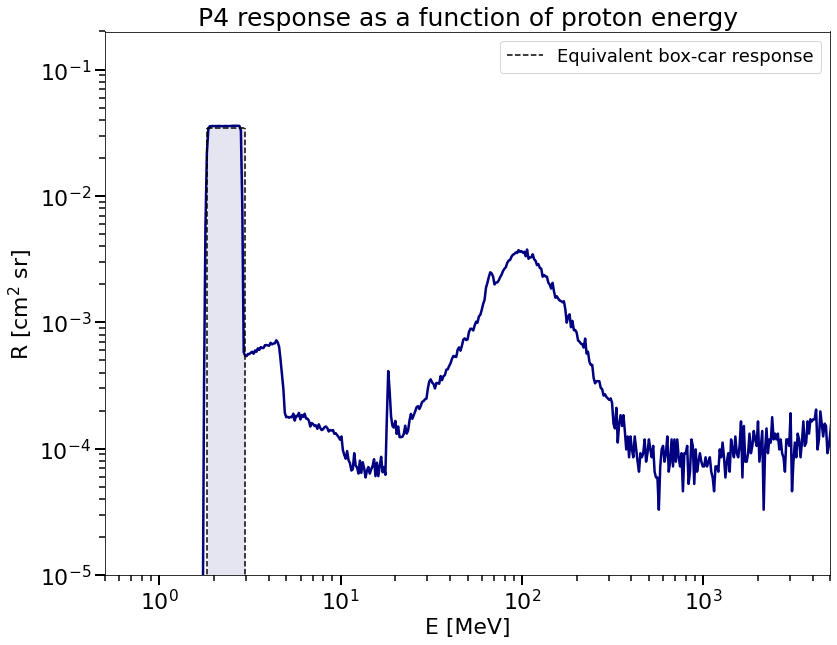

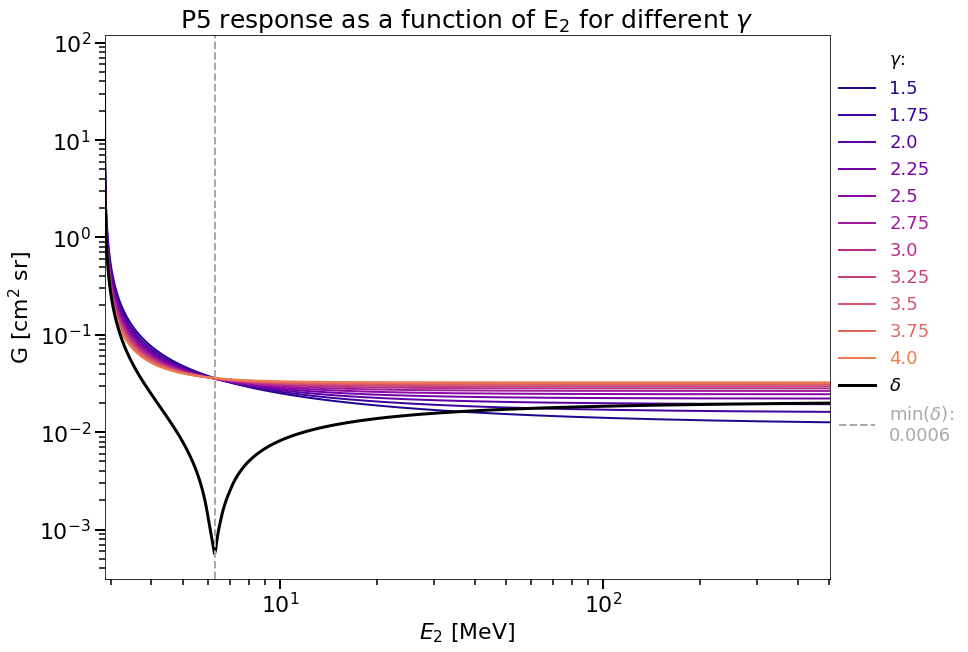

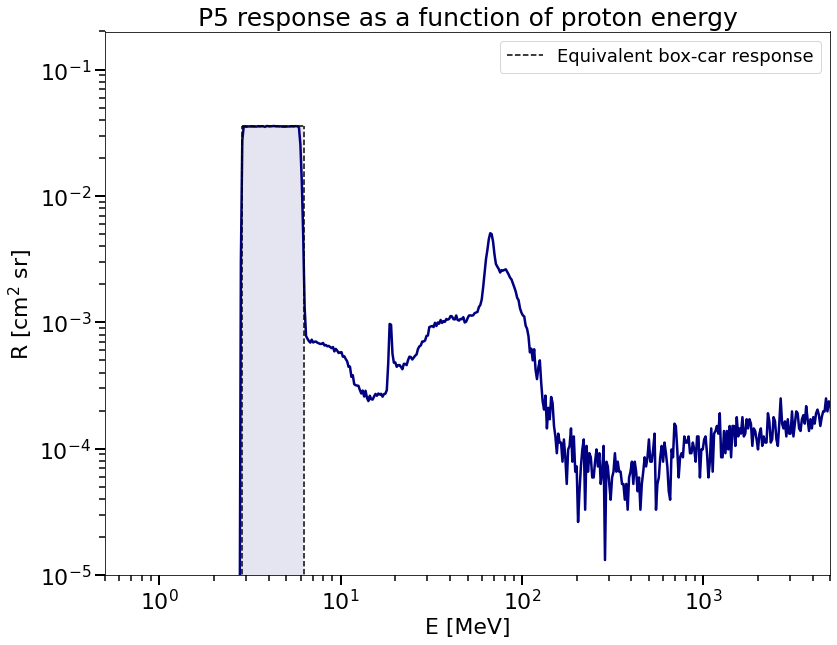

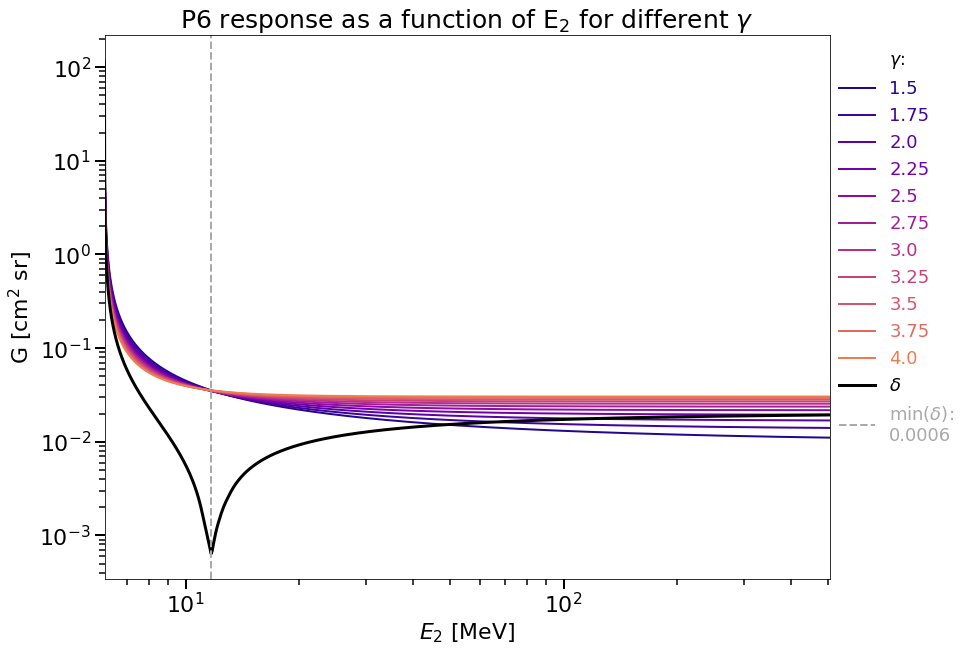

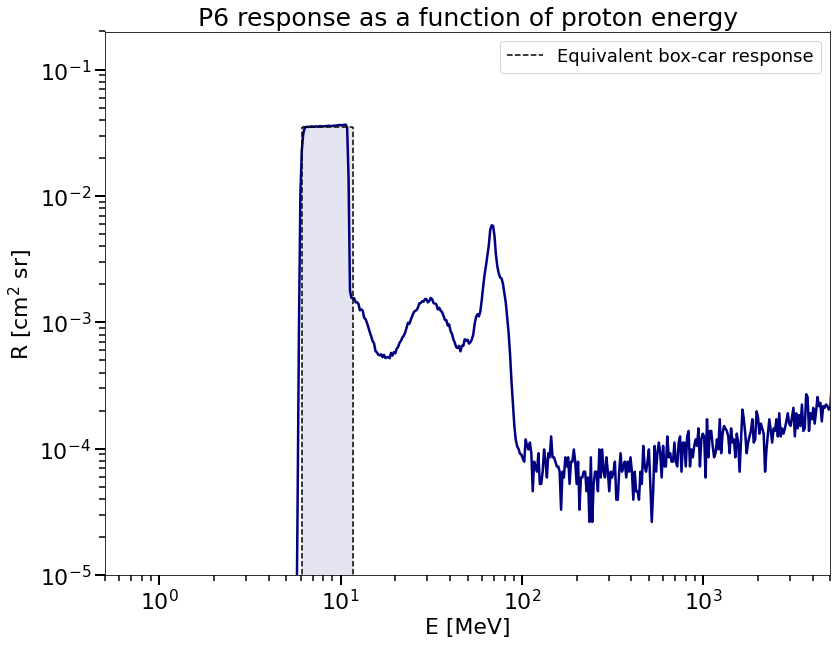

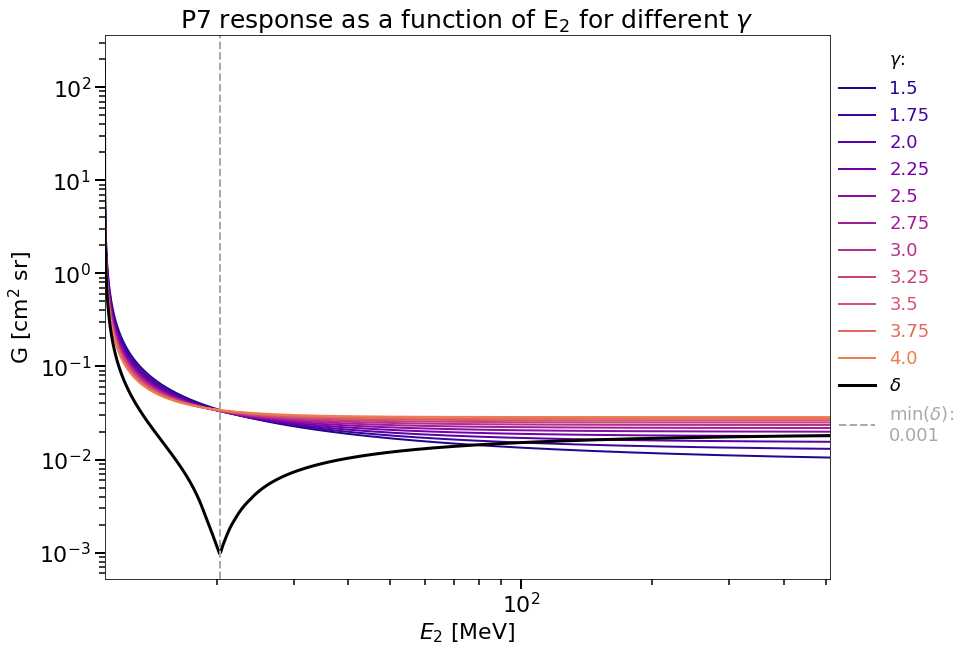

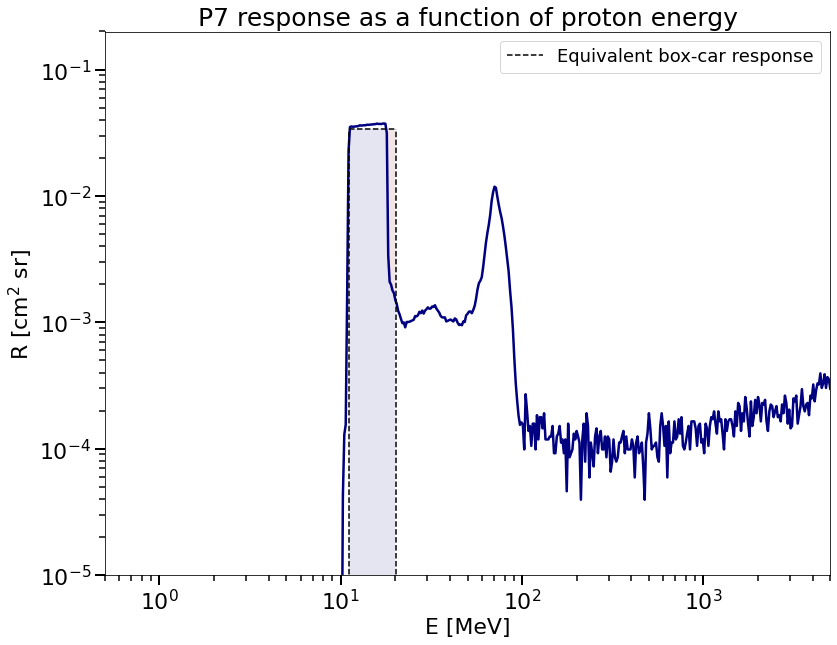

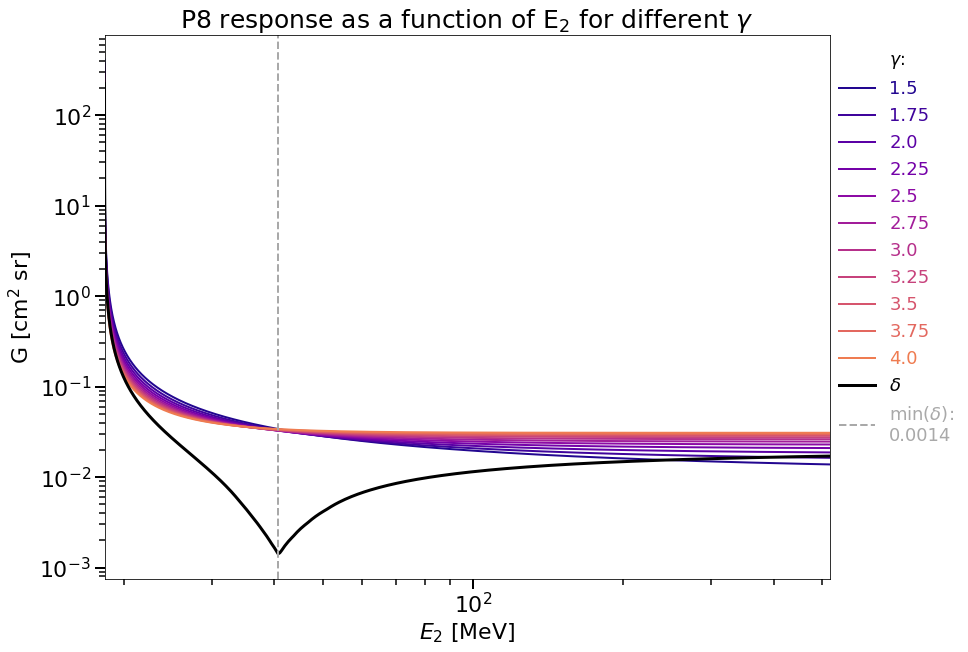

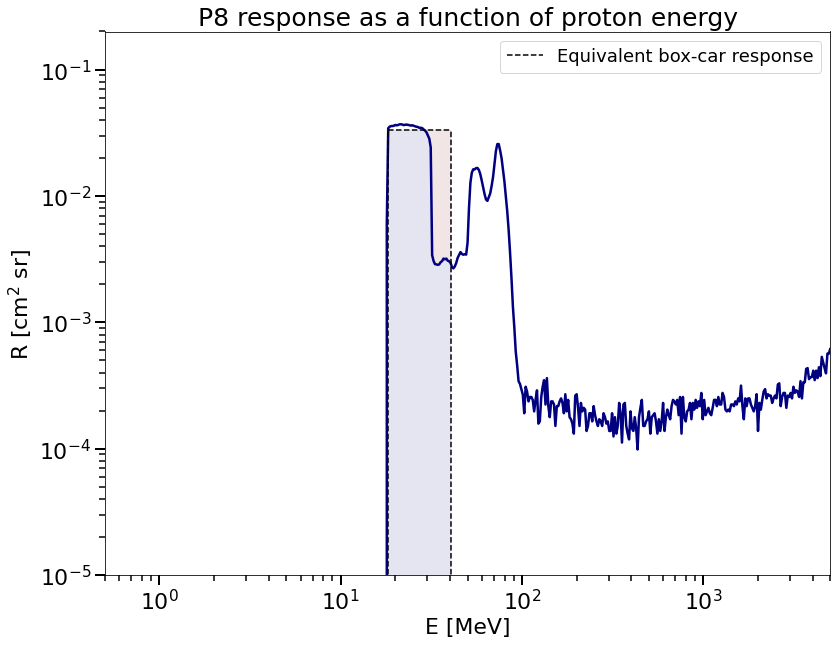

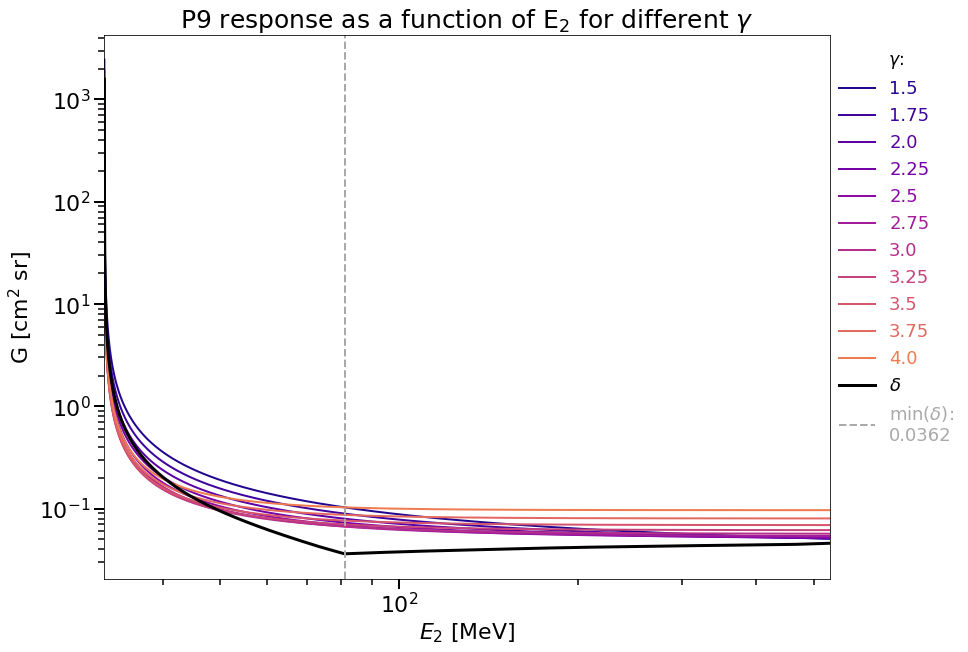

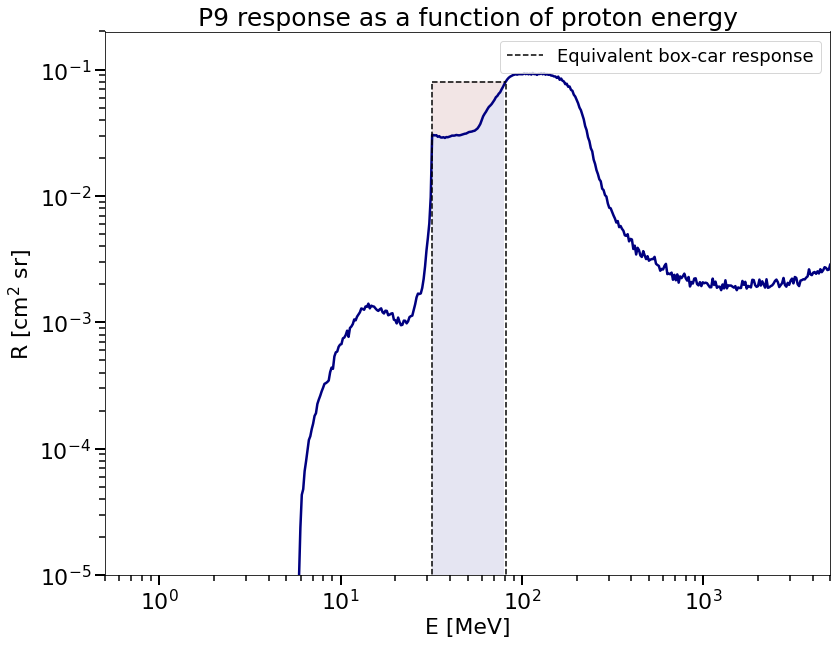

In [5]:
p_bowtie_results = modified_bowtie(data=p_responses, side=side, channel="all", max_energy=500, save=False)

In [6]:
p_bowtie_results

{'P1': (0.9910458562488608, 1.2828417005854824, 0.012452109087168787),
 'P2': (1.1039991779173977, 1.3403482427801854, 0.024578558299800414),
 'P3': (1.2521496890655568, 1.9112880647587787, 0.034522125807933894),
 'P4': (1.8269167179409245, 2.983145657661539, 0.03444228848889629),
 'P5': (2.86438407149338, 6.2753176954600125, 0.03563229405675286),
 'P6': (6.097562352214592, 11.67496632064843, 0.03509364826336091),
 'P7': (11.039991779173976, 20.28894569323628, 0.033567335672211304),
 'P8': (18.26916717940924, 40.68209100422778, 0.03317288086651388),
 'P9': (31.908489806291083, 81.13427453220285, 0.08031003270762493)}

#### Saves the bowtie results to .csv tables:

In [7]:
save_bowtie_results(p_bowtie_results)
save_bowtie_results(e_bowtie_results)